Loading all the required modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


In [4]:
train_titan = pd.read_csv('train_titan.csv',index_col = 0)
test_titan = pd.read_csv('test_titan.csv',index_col = 0)

train_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [34]:
train_titan.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_titan.mode(axis = 0,numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,24.0,0,0,8.05


In [17]:
train_titan.cov()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [35]:
train_titan.kurtosis()

pandas.core.series.Series

In [22]:
train_titan.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

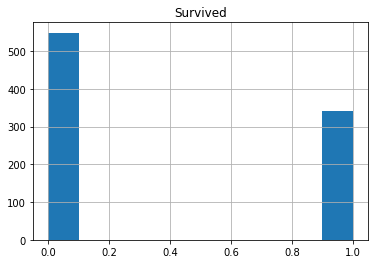

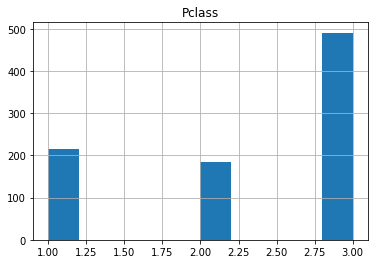

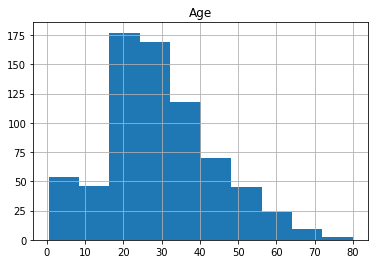

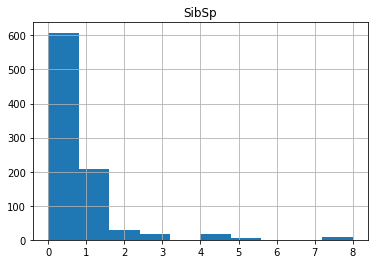

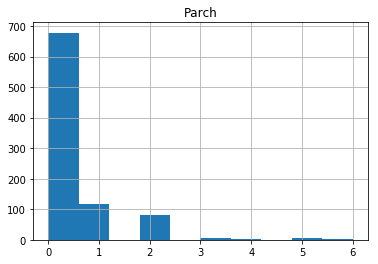

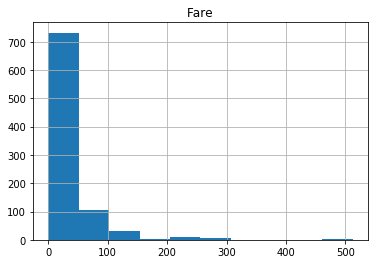

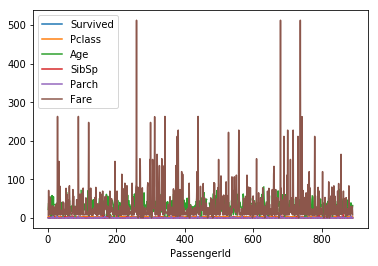

In [32]:
plt_train_titan = train_titan.select_dtypes(include=['int64','float64'])

for i in plt_train_titan.columns:
    plt_train_titan.hist(column = i)
plt_train_titan.plot.line()

In [26]:
train_titan.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
total = train_titan.isnull().sum().sort_values(ascending = False)
percent1 = train_titan.isnull().sum()*100/train_titan.isnull().count()
percent = (round(percent1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['total','%'])
missing_data.head()

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
